In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import warnings
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
warnings.filterwarnings("ignore")
np.random.RandomState = 42

**(0.5 балла) Доп. Задача 1.** Найдите число $m$ такое, что для заданных $x_i$ сумма $\sum|m - x_i|$ минимальна\
Раскроем модуль: пусть имеется $k$ значений $x_i$ < $m$, и $r$ значений $x_i$ >= $m$: \
$\sum_{i=1}^k(m - x_i) + \sum_{i=1}^r(x_i - m) $\
Дифференцируем по $m$ и приравниваем к нулю, получим $km - rm = 0$\
Значит, $k=m$, то есть $m$ - медиана для $x_i$

\
**(0.5 балла) Доп. Задача 2.** Найдите число m такое, что для заданных $x_i$ сумма $\sum(m - x_i)^2$ минимальна

Дифференцируя выражение по m, и приравнивая к нулю, получаем:\
$2\sum_{i=1}^n(m - x_i) = mn - \sum_{i=1}^n(x_i) = 0$ \
Таким образом $m = \frac{\sum_{i=1}^n(x_i)}{n} = mean(x_i)$ - среднее арифметическое.


**(1 балл) Обязательное задание 1:** попробуйте увеличить степень полинома интерполяции. Что произойдет с графиком нашего приближения?  Посмотрите  как обе функции себя ведут вне интервала x. Попробуйте сформулировать проблему, с которой мы столкнулись.

\
При увеличении степени интерполяционного многочлена он более точно проходит через точки, но при этом не является таким похожим на истинную функцию из-за шума. На равномерной сетке хуже всего поведение многочлена на краях - теряется устойчивость. Вне интервала х функции сначала близки, но потом полином высокой степени резко меняет свое направление. 

\
Ситуацию может улучшить применение сгущенной или чебышевской сетки, или применение сплайнов или МНК

In [ ]:
def f_real(x):
    return 20 * x ** 3 - 2 * x**2 + x + np.random.normal(0, 1, x.shape)

def f(x):
    return 20 * x ** 3 - 2 * x**2 + x

In [ ]:
x = np.linspace(-1, 1, 10)
y = f_real(x) # + np.random.normal(0, 0.5, 10)  # случайный шум

In [ ]:
x100 = np.linspace(-1, 1, 100)
x1000 = np.linspace(-2, 2, 1000)

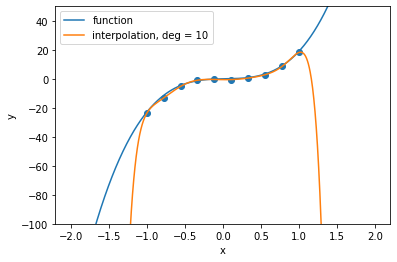

In [ ]:
coefs = np.polyfit(x, y, deg = 10)
poly = np.poly1d(coefs)
plt.scatter(x, y)
plt.plot(x1000, f(x1000), label = 'function')
plt.plot(x1000, poly(x1000), label =  'interpolation, deg = 10')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.ylim(-100, 50)
plt.show()

**(1 балл)  Обязательное задание 2:** напишите функцию, которая для данного многочлена считает его качество на тестовом множестве (то есть среднеквадратичное отклонение между значениями функции $f$ и многочлена $P$ на тестовой выборке).

Вы все прошлое занятие изучали разные функции, попробуйте сделать MSE как можно более компактной функцией (желательно в одну строчку).

In [ ]:
# возьмем 50 случайных точек от 0 до 1
x_test = 2*np.random.random(50) - 1

In [ ]:
def quality(f, poly, x_test):
  return np.mean((y_real - y_pred)**2)

In [ ]:
quality(f, poly, x_test)

0.710258143891726

**(1 балл) Обязательное задание 3:** нарисуйте график зависимости ошибки на тестовом множестве от степени многочлена. При какой степени ошибка минимальна?


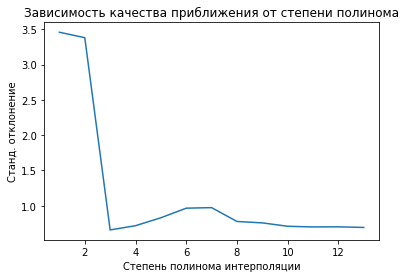

In [ ]:
l = 13
errors = np.zeros((l, 1))
degrees = np.arange(1, l+1)
for i in degrees:
  coefs1 = np.polyfit(x, y, deg = i)
  poly1 = np.poly1d(coefs1)
  errors[i-1] = quality(f, poly1, x_test)

plt.plot(degrees, errors)
plt.xlabel('Степень полинома интерполяции')
plt.ylabel('Станд. отклонение')
plt.title('Зависимость качества приближения от степени полинома')
plt.show()

Таким образом, ошибка минимальна при deg = 3, а также невелика при степенях, слегка ее превосходящих.

**(1 балл) Доп. задача 5:** как меняется график, если увеличивать количество точек в множестве, на котором мы подбираем многочлен?

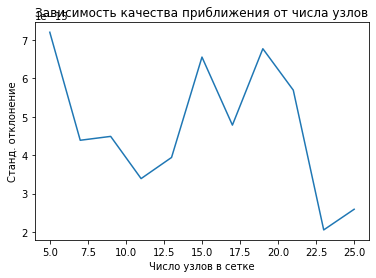

In [ ]:
l = 25
dots = np.arange(5, l+1, 2)
errors = np.zeros(1)
for i in dots:
  x = np.linspace (-1, 1, i)
  y = f(x)
  coefs2 = np.polyfit(x, y, deg = 3)
  poly2 = np.poly1d(coefs2)
  errors = np.append(errors, quality(f, poly2, x_test))

plt.plot(dots, errors[1:])
plt.xlabel('Число узлов в сетке')
plt.ylabel('Станд. отклонение')
plt.title('Зависимость качества приближения от числа узлов')
plt.show()

В целом отклонение уменьшается с увеличением числа точек в сетке.

### Еще одно задание


**(1 балл) Доп. задача 6:** проделайте все вышеописанное с функцией $f(x) = \frac{1}{1 + e^{-x}}$ на отрезке $[-3, 3]$. Как оптимальная степень зависит от количества точек, по которым вы подбираете многочлен?

1. Построить заданную функцию

2. Взять 10 точек от -3 до 3 и приближать её полиномом разной степени, построить график ошибки

3. Взять 10 случайных точек от -3 до 3 и посмотреть ошибку на этих точках полиномиальных функций обученных по пункту 2 (т.е. взять тренировочные точки для обучения из пункта 2, а тестировать случайными точками) построить график.

4. Добавить в функцию случайный шум и проделать пункты 2 и 3 для неё.

5. Увеличить количество тренировочных(только тренировочных) точек с 10 например до 20 40 60. И проделать пункты 2 и 3, для этих сэмплов

6. Сделать выводы.

In [ ]:
def sigm(x):
  return 1 / (1+ np.exp(-x))

def almost_sigm(x):
  return 1 / (1+ np.exp(-x)) + np.random.normal(0, 1, x.shape)

In [ ]:
X = np.linspace(-3, 3, 10)
X1 = np.linspace(-3, 3, 20)
X2 = np.linspace(-3, 3, 60)
Y = sigm (X) 
Y1 = sigm (X1) 
Y2 = sigm (X2)
Y_almost = almost_sigm(X)
X_test = 6*np.random.random(100)-3

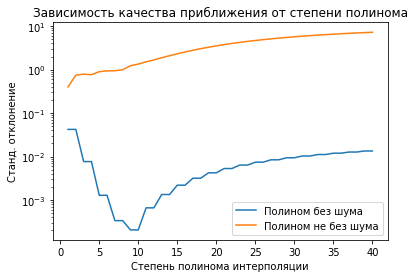

In [ ]:
l = 40
errors_ideal = np.zeros((l, 1))
errors_real = np.zeros((l, 1))
degrees = np.arange(1, l+1)
for i in degrees:
  coefs3 = np.polyfit(X, Y, deg = i)
  poly3 = np.poly1d(coefs3)
  errors_ideal[i-1] = quality(sigm, poly3, X_test)

  coefs3_real = np.polyfit(X, Y_almost, deg = i)
  poly3_real = np.poly1d(coefs3_real)
  errors_real[i-1] = quality(sigm, poly3_real, X_test)

plt.semilogy(degrees, errors_ideal, label = 'Полином без шума')
plt.semilogy(degrees, errors_real, label = 'Полином не без шума')
plt.xlabel('Степень полинома интерполяции')
plt.ylabel('Станд. отклонение')
plt.title('Зависимость качества приближения от степени полинома')
plt.legend()
plt.show()

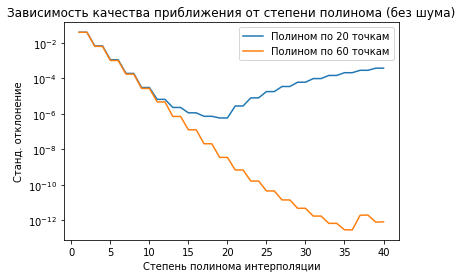

In [ ]:
l = 40
errors_ideal1 = np.zeros((l, 1))
errors_ideal2 = np.zeros((l, 1))
degrees = np.arange(1, l+1)
for i in degrees:
  coefs31 = np.polyfit(X1, Y1, deg = i)
  poly31 = np.poly1d(coefs31)
  errors_ideal1[i-1] = quality(sigm, poly31, X_test)

  coefs32 = np.polyfit(X2, Y2, deg = i)
  poly32 = np.poly1d(coefs32)
  errors_ideal2[i-1] = quality(sigm, poly32, X_test)


plt.semilogy(degrees, errors_ideal1, label = 'Полином по 20 точкам')
plt.semilogy(degrees, errors_ideal2, label = 'Полином по 60 точкам')
plt.xlabel('Степень полинома интерполяции')
plt.ylabel('Станд. отклонение')
plt.title('Зависимость качества приближения от степени полинома (без шума)')
plt.legend()
plt.show()

##Выводы:
1. На качество интерполяйии влияет увеличение числа узлов в сетке (до некоторого значения улучшает, потом обратно ухудшает)
2. Увеличение степени полинома помогает приближать точнее, но также лишь до некоторого значения. Потом слишком большая степень все портит
3. Шум вносит свои коррективы и усложняет качественную интерполяцию


### А вот и еще одно задание

In [ ]:
!gdown --id 13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb

Downloading...
From: https://drive.google.com/uc?id=13kQUcl-N3ag6NXEm-QWjdUiuHO4-LOxb
To: /content/Advertising.csv
100% 5.17k/5.17k [00:00<00:00, 5.52MB/s]


In [ ]:
data = pd.read_csv('Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [ ]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

А теперь сделайте так, чтобы сохранялась ошибка не на обучающей выборке, а на кросс-валдиации (cross_val_score) и минимум выбирался из неё. 

In [ ]:
X = data.drop('Sales', axis = 1)
y = data['Sales']

In [ ]:
lambdas = np.arange(0.1, 3.0, 0.1)

lambdas_errors = []

for val in lambdas:
    reg = Lasso(alpha = val)

    err = np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambdas_errors.append([val, err])

    #print('If lambda = ', val.round(2), ', error = ', err)
    

min_val, min_train_error = min(lambdas_errors, key=lambda x: x[1])

# Лучшая модель
#best_reg = Lasso(alpha=min_val)
#cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("Оптимальная Lambda={:.2f}, результат={:.4f}".format(min_val, min_train_error))

Оптимальная Lambda=1.90, результат=3.0288


**(0.5 балла) Обязательное задание 4:** нарисуйте график зависимости ошибки на тестовом множестве от коэффициента регуляризации. При какой степени ошибка минимальна?

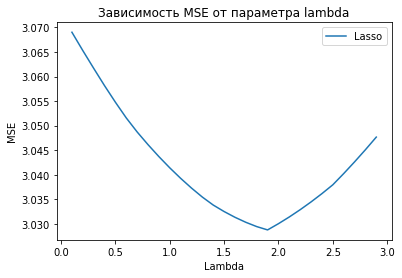

In [ ]:
plt.plot(np.array(lambdas_errors)[:,0], np.array(lambdas_errors)[:,1], label = 'Lasso')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Зависимость MSE от параметра lambda')
plt.legend()
plt.show()

**(0.5 балла) Обязательное задание 5:** Сделайте то же самое для L2-регуляризации:

In [ ]:
lambdas = np.arange(0.1, 3.1, 0.1)

lambdas_errors = []

for val in lambdas:
    reg = Ridge(alpha = val)

    err = np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))
    lambdas_errors.append([val, err])

    #print('If lambda = ', val.round(2), ', error = ', err)
    
    
min_val, min_train_error = min(lambdas_errors, key=lambda x: x[1])

# Лучшая модель
best_reg = Ridge(alpha=min_val)
cv_error = -np.mean(cross_val_score(best_reg, X, y, cv=5, scoring='neg_mean_squared_error'))

print("Оптимальная Lambda={:.2f}, результат={:.4f}".format(min_val, cv_error))

Оптимальная Lambda=3.00, результат=3.0729


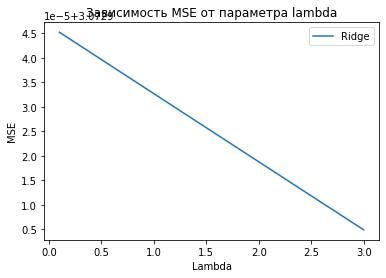

In [ ]:
plt.plot(np.array(lambdas_errors)[:,0], np.array(lambdas_errors)[:,1], label = 'Ridge')
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('Зависимость MSE от параметра lambda')
plt.legend()
plt.show()

Здесь можно заметить, что при увеличении lambda метод выбирает наибольший, так как, видимо, стремится максимально уменьшить веса. В Lasso такого не происходило